In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import plotly.express as px
import plotly.graph_objects as go
os.listdir()

['amazon.csv', 'newplot.png', 'project3.ipynb', 'project3.ipynb (df).csv']

In [2]:
df = pd.read_csv('amazon.csv')
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [3]:
def clean_values(value):
    # Split the value by comma and return the first part (User ID or User Name)
    return value.split(',')[0].strip()  # Change the index to [1] for User Name if needed

# Apply the function to clean up each column
df['user_id'] = df['user_id'].apply(clean_values)
df['user_name'] = df['user_name'].apply(clean_values)
df['review_id'] = df['review_id'].apply(clean_values)
df['review_title'] = df['review_title'].apply(clean_values)

In [4]:
df.isnull().any()

product_id             False
product_name           False
category               False
discounted_price       False
actual_price           False
discount_percentage    False
rating                 False
rating_count            True
about_product          False
user_id                False
user_name              False
review_id              False
review_title           False
review_content         False
img_link               False
product_link           False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [6]:
df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

In [7]:
df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

In [8]:

df['rating'] = df['rating'].str.replace(".",',')
df['actual_price'] = df['actual_price'].astype('float64')

C:\Users\Yayat Supriyatna\AppData\Local\Temp\ipykernel_21568\745301728.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['rating'] = df['rating'].str.replace(".",',')


In [9]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')
df['discount_percentage'] = df['discount_percentage'] / 100

In [10]:
df['rating_count'] = df['rating_count'].str.replace(",",'').astype('float64')

In [11]:
df['rating'].unique()


array(['4,2', '4,0', '3,9', '4,1', '4,3', '4,4', '4,5', '3,7', '3,3',
       '3,6', '3,4', '3,8', '3,5', '4,6', '3,2', '5,0', '4,7', '3,0',
       '2,8', '4', '3,1', '4,8', '2,3', '|', '2', '3', '2,6', '2,9'],
      dtype=object)

In [12]:
df = df[df['rating'] != '|']

In [13]:
df['rating'] = df['rating'].str.replace(",",'.')

C:\Users\Yayat Supriyatna\AppData\Local\Temp\ipykernel_21568\4017037734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].str.replace(",",'.')


In [14]:
df['rating'] = df['rating'].astype(float)


C:\Users\Yayat Supriyatna\AppData\Local\Temp\ipykernel_21568\3813225772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].astype(float)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1464 non-null   object 
 1   product_name         1464 non-null   object 
 2   category             1464 non-null   object 
 3   discounted_price     1464 non-null   float64
 4   actual_price         1464 non-null   float64
 5   discount_percentage  1464 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1464 non-null   object 
 9   user_id              1464 non-null   object 
 10  user_name            1464 non-null   object 
 11  review_id            1464 non-null   object 
 12  review_title         1464 non-null   object 
 13  review_content       1464 non-null   object 
 14  img_link             1464 non-null   object 
 15  product_link         1464 non-null   o

In [17]:
df = df.dropna(subset=['rating_count'])

In [18]:
df.isna().any()

product_id             False
product_name           False
category               False
discounted_price       False
actual_price           False
discount_percentage    False
rating                 False
rating_count           False
about_product          False
user_id                False
user_name              False
review_id              False
review_title           False
review_content         False
img_link               False
product_link           False
dtype: bool

In [19]:
df = df.rename(columns={'actual_price': 'actual_price_₹',
                        'discounted_price': 'discounted_price_₹'
})

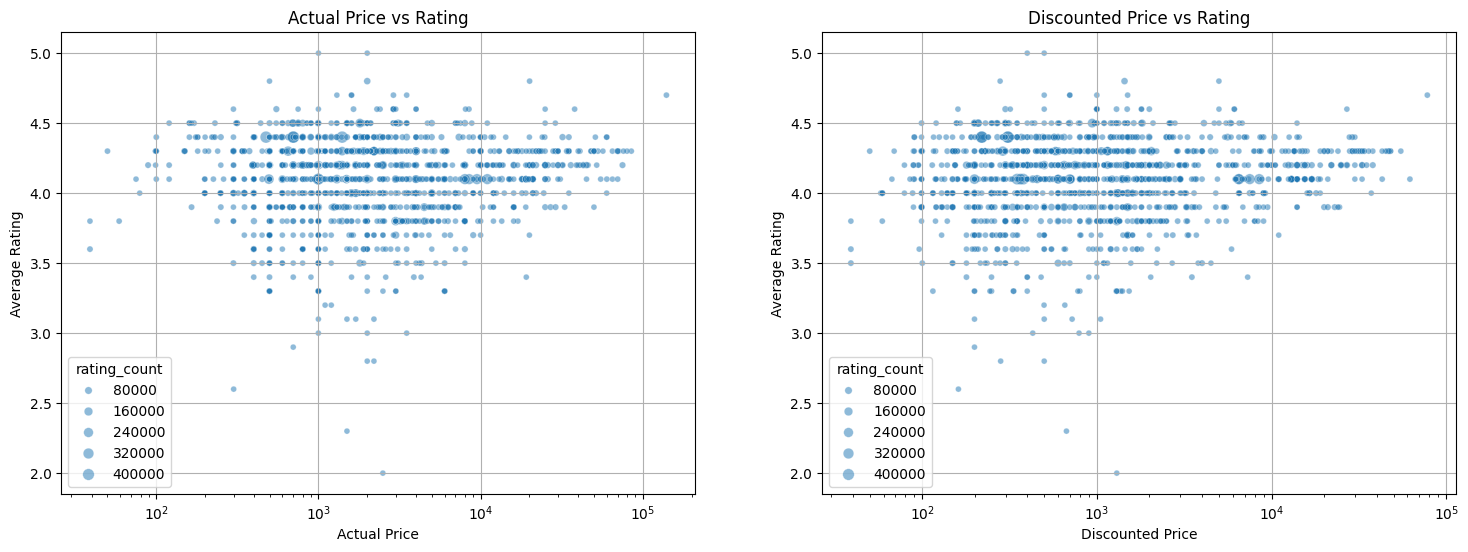

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# actual price vs rating
sns.scatterplot(ax=axes[0], data=df, x='actual_price_₹', y='rating', size='rating_count', alpha=0.5)
axes[0].set_title('Actual Price vs Rating')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Average Rating')
axes[0].set_xscale('log')
axes[0].grid(True)

# discounted price vs rating
sns.scatterplot(ax=axes[1], data=df, x='discounted_price_₹', y='rating', size='rating_count', alpha=0.5)
axes[1].set_title('Discounted Price vs Rating')
axes[1].set_xlabel('Discounted Price')
axes[1].set_ylabel('Average Rating')
axes[1].set_xscale('log')  
axes[1].grid(True)

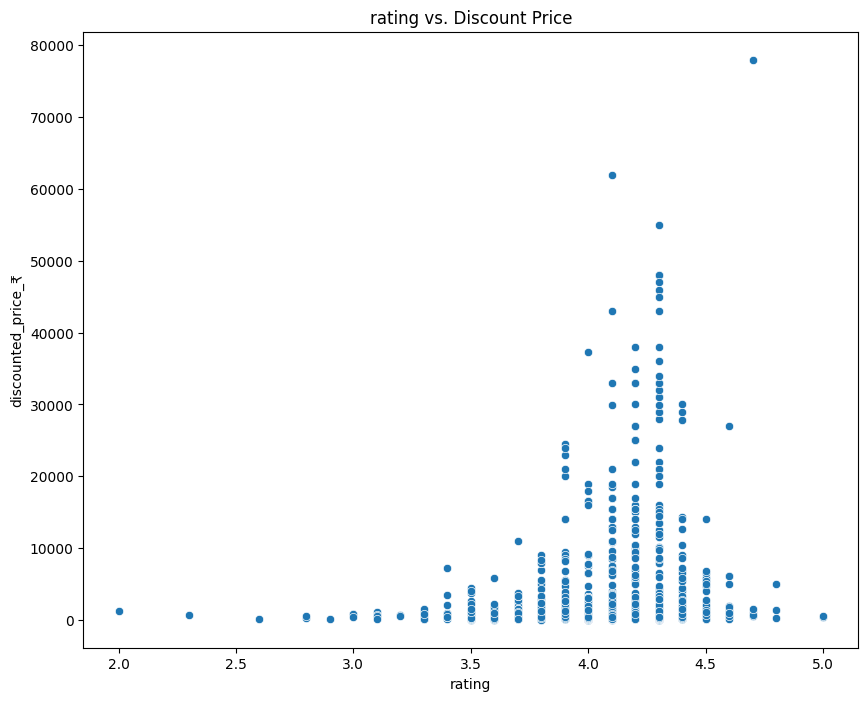

In [21]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='rating', y='discounted_price_₹', data=df)
plt.title('rating vs. Discount Price')
plt.show()

In [22]:
# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(df, x='actual_price_₹', y='discounted_price_₹', z='rating', color='rating',
                     hover_data=['product_name'], title='Interactive 3D Scatter Plot')
fig.show()